In [2]:
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 3))
import math

<Figure size 500x300 with 0 Axes>

第一章作业上机实验

In [13]:
alpha, beta = -1e9, -1
a, b, c = 1, alpha + beta, 1e9

x1, x2 = (-2 * c) / (b + (b ** 2 - 4 * a * c) ** 0.5) \
       , (-2 * c) / (b - (b ** 2 - 4 * a * c) ** 0.5)

print(x1, x2)

1000000000.0 1.0


In [14]:
def fpow(x: float, y: int) -> float:
    res: float = 1
    while y:
        if y & 1:
            res *= x
        x *= x
        y >>= 1
    return res

x, y = 42, 31
print(fpow(x, y))

209280132851277227501988209234026802122409700753408


第二章作业上机实验

$x_{k + 1} = 15 - x_k^2, k = 0, 1, 2, \cdots$，$x_0 = 2$

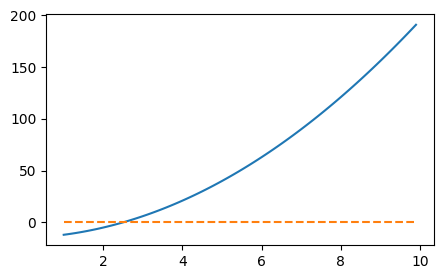

In [21]:
lim = 100
x = [2]
for i in range(lim):
    # x.append(15 - 2 * (x[-1] ** 2))
    # print(x[-1])
    pass

def f(x: float) -> float:
    return 2 * (x**2) + x - 15

x = np.arange(1, 10, 0.1)
y = f(x)
z = np.zeros_like(x)

plt.figure(figsize=(5, 3))
plt.plot(x, y)
plt.plot(x, z, linestyle='--')


$x_{k + 1} = \cfrac{15}{2x_k + 1}, k = 0, 1, 2, \cdots$，$x_0 = 2$

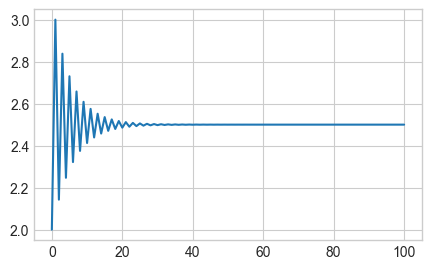

In [ ]:
lim = 100
x = [2]
for i in range(lim):
    x.append(15 / (2 * x[-1] + 1))

plt.figure(figsize=(5, 3))
plt.plot(x)

$x_{k + 1} = x_k - \cfrac{2x_k^2 + x_k - 15}{4x_k + 1}, k = 0, 1, 2, \cdots$，$x_0 = 2$

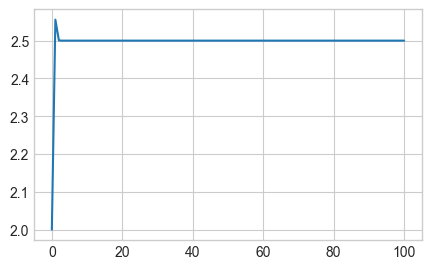

In [ ]:
lim = 100
x = [2]
for i in range(lim):
    x.append(x[-1] - (2 * x[-1] ** 2 + x[-1] - 15) / (4 * x[-1] + 1))

plt.figure(figsize=(5, 3))
plt.plot(x)

证明方程 $2 - 3x - \sin x = 0$ 在 $(0, 1)$ 内有且仅有一个实根。使用二分法求误差不大于 $0.0005$ 的根，及需要的迭代次数。

In [ ]:
def f(x: float) -> float:
    return 2 - 3 * x - math.sin(x)

TOL = 0.0005
l, r = 0, 1
cnt = 0
while (r - l) > TOL:
    cnt += 1
    x = (l + r) / 2
    if f(x) > 0:
        l = x
    else:
        r = x

print(x, cnt, f(x))

0.50537109375 11 -0.0002454600314260591


利用牛顿法求解方程 $ \cfrac 12 + \cfrac 14 x^2 - x \sin x - \cfrac 12 \cos 2x = 0$，分别取 $x_0 = \cfrac \pi 2, 5 \pi, 10 \pi$ 使得精度不小于 $10^{-5}$。比较初值对计算结果的影响。

In [14]:
def f(x: float) -> float:
    return 0.5 + 0.25 * x ** 2 - x * math.sin(x) - 0.5 * math.cos(2 * x)

def df(x: float) -> float:
    return 0.5 * x - math.sin(x) - x * math.cos(x) + math.sin(2 * x)

def newton(x0: float) -> float:
    TOL = 1e-10
    cnt = 0
    for i in range(100000):
        cnt += 1
        x = x0 - f(x0) / df(x0)
        # if abs(x - x0) < TOL:
        #     x0 = x
        #     break
        x0 = x
    return x, cnt

x0s = [math.pi / 2, 5 * math.pi, 10 * math.pi]
for x0 in x0s:
    res, cnt = newton(x0)
    print(f'x0 = {x0}, res = {res}, cnt = {cnt}')

x0 = 1.5707963267948966, res = 1.8954942623905824, cnt = 100000
x0 = 15.707963267948966, res = 1.8954942863748587, cnt = 100000
x0 = 31.41592653589793, res = 1.8954942774380925, cnt = 100000


已知 $f(x) = 5x - e^x$ 在 $(0, 1)$ 之间有一个实根，试分别利用二分法、牛顿法、割线法、错位法设计相关的计算格式，并编程求解。精确到四位小数。

In [22]:
def f(x: float) -> float:
    return 5 * x - math.exp(x)

def df(x: float) -> float:
    return 5 - math.exp(x)

def bisection(l: float, r: float) -> float:
    TOL = 1e-4
    cnt = 0
    while (r - l) > TOL:
        cnt += 1
        x = (l + r) / 2
        if f(x) * f(r) < 0:
            l = x
        else:
            r = x
    return x, cnt

def newton(x0: float) -> float:
    TOL = 1e-4
    cnt = 0
    while True:
        cnt += 1
        x = x0 - f(x0) / df(x0)
        if abs(x - x0) < TOL:
            break
        x0 = x
    return x, cnt

def secant(x0: float, x1: float) -> float:
    TOL = 1e-4
    cnt = 0
    while True:
        cnt += 1
        x = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x - x1) < TOL:
            break
        x0, x1 = x1, x
    return x, cnt

def regula_falsi(x0: float, x1: float) -> float:
    TOL = 1e-4
    cnt = 0
    while True:
        cnt += 1
        x = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x - x1) < TOL:
            break
        if f(x) * f(x1) < 0:
            x0 = x
        else:
            x1 = x
    return x, cnt

l, r = 0, 1
res, cnt = bisection(l, r)
print(f'bisection: res = {res}, cnt = {cnt}')

x0 = 0.5
res, cnt = newton(x0)
print(f'newton: res = {res}, cnt = {cnt}')

x0, x1 = 0, 1
res, cnt = secant(x0, x1)
print(f'secant: res = {res}, cnt = {cnt}')

x0, x1 = 0, 1
res, cnt = regula_falsi(x0, x1)
print(f'regula_falsi: res = {res}, cnt = {cnt}')

bisection: res = 0.25921630859375, cnt = 14
newton: res = 0.25917110166149104, cnt = 3
secant: res = 0.2591712288816814, cnt = 4
regula_falsi: res = 0.25917408510579704, cnt = 4


第三章作业上机实验

以 $y = \sin(x)$ 为例，在 $[0,π]$ 区间内生成 $11$ 个、$21$ 个数据点，设计算法或程序，用上述 $4$ 个边界条件，分别计算其样条插值，并作图比较，分析其差异性。

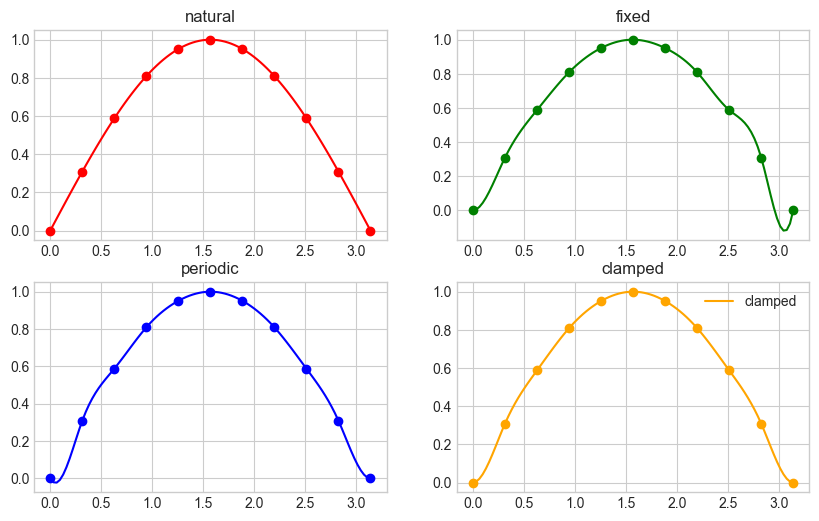

In [ ]:
def f(x: float) -> float:
    return math.sin(x)

X = np.linspace(0, math.pi, 11)
Y = [f(x) for x in X]

# 自然边界
def natural_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 1
    A[n][n] = 1
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = natural_cubic_spline(X, Y)

x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_natural, y_natural = x, y

# 固定边界
def fixed_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * f0
    B[n] = 3 * fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = fixed_cubic_spline(X, Y, 0, math.pi)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_fixed, y_fixed = x, y

# 周期边界
def periodic_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    B[n] = 3 * (Y[0] - Y[n]) / (X[0] - X[n]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = periodic_cubic_spline(X, Y)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_periodic, y_periodic = x, y

# 强制第一个子区间和第二个子区间样条多项式的三阶导数相同，倒数第二个子区间和最后一个子区间的三次样条函数的三阶导数相等
def clamped_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - f0
    B[n] = fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = clamped_cubic_spline(X, Y, 0, 0)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_clamped, y_clamped = x, y

# 绘制一个四个图 2 * 2 排布的子图
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1, title='natural')
plt.plot(x_natural, y_natural, label='natural', color='red')
plt.scatter(X, Y, color='red')
plt.subplot(2, 2, 2, title='fixed')
plt.plot(x_fixed, y_fixed, label='fixed', color='green')
plt.scatter(X, Y, color='green')
plt.subplot(2, 2, 3, title='periodic')
plt.plot(x_periodic, y_periodic, label='periodic', color='blue')
plt.scatter(X, Y, color='blue')
plt.subplot(2, 2, 4, title='clamped')
plt.plot(x_clamped, y_clamped, label='clamped', color='orange')
plt.scatter(X, Y, color='orange')

plt.legend()
plt.show()

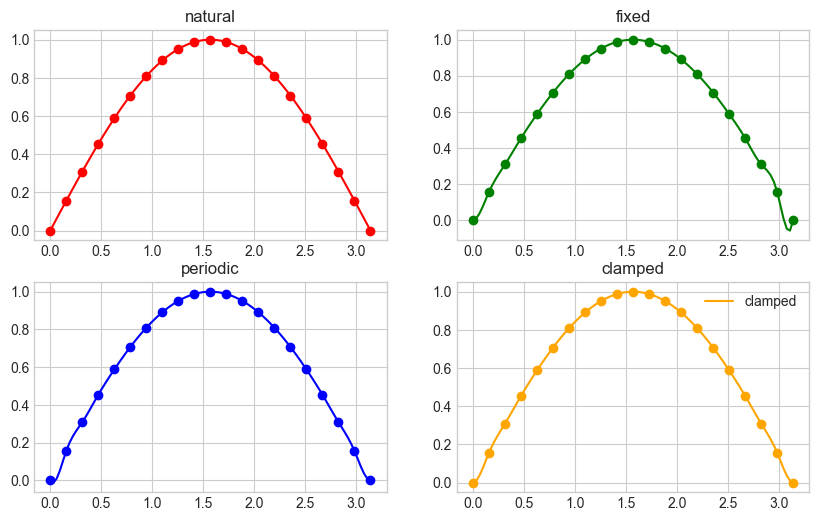

In [ ]:
def f(x: float) -> float:
    return math.sin(x)

X = np.linspace(0, math.pi, 21)
Y = [f(x) for x in X]

# 自然边界
def natural_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 1
    A[n][n] = 1
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = natural_cubic_spline(X, Y)

x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_natural, y_natural = x, y

# 固定边界
def fixed_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * f0
    B[n] = 3 * fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = fixed_cubic_spline(X, Y, 0, math.pi)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_fixed, y_fixed = x, y

# 周期边界
def periodic_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    B[n] = 3 * (Y[0] - Y[n]) / (X[0] - X[n]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = periodic_cubic_spline(X, Y)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_periodic, y_periodic = x, y

# 强制第一个子区间和第二个子区间样条多项式的三阶导数相同，倒数第二个子区间和最后一个子区间的三次样条函数的三阶导数相等
def clamped_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - f0
    B[n] = fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = clamped_cubic_spline(X, Y, 0, 0)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_clamped, y_clamped = x, y

# 绘制一个四个图 2 * 2 排布的子图
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1, title='natural')
plt.plot(x_natural, y_natural, label='natural', color='red')
plt.scatter(X, Y, color='red')
plt.subplot(2, 2, 2, title='fixed')
plt.plot(x_fixed, y_fixed, label='fixed', color='green')
plt.scatter(X, Y, color='green')
plt.subplot(2, 2, 3, title='periodic')
plt.plot(x_periodic, y_periodic, label='periodic', color='blue')
plt.scatter(X, Y, color='blue')
plt.subplot(2, 2, 4, title='clamped')
plt.plot(x_clamped, y_clamped, label='clamped', color='orange')
plt.scatter(X, Y, color='orange')

plt.legend()
plt.show()

求一个次数不高于 $4$ 次的多项式，满足 $f(1) = f'(1) = 0$，$f(2) = f'(2) = 0$，$f(3) = 1$

In [ ]:
def f(x: float) -> float:
    return 0.25 * (x - 1) ** 2 * (x - 2) ** 2

def df(x: float) -> float:
    return 0.5 * (x - 1) * (x - 2) * (2 * x - 3)

print(f'f(1) = {f(1)}, f\'(1) = {df(1)}, f(2) = {f(2)}, f\'(2) = {df(2)}, f(3) = {f(3)}')

f(1) = 0.0, f'(1) = 0.0, f(2) = 0.0, f'(2) = 0.0, f(3) = 1.0


求一个次数不高于 $4$ 次的多项式，满足 $f(0) = f'(0) = 0$，$f(1) = f'(1) = 1$，$f(2) = 1$

In [ ]:
A = np.array([[1, 1, 1], [4, 3, 2], [16, 8, 4]])
B = np.array([1, 1, 1])
X = np.linalg.solve(A, B)

print(X)

def f(x: float) -> float:
    return X[0] * x ** 4 + X[1] * x ** 3 + X[2] * x ** 2

def df(x: float) -> float:
    return 4 * X[0] * x ** 3 + 3 * X[1] * x ** 2 + 2 * X[2] * x

print(f'f(0) = {f(0)}, f\'(0) = {df(0)}, f(1) = {f(1)}, f\'(1) = {df(1)}, f(2) = {f(2)}')

[ 0.25 -1.5   2.25]
f(0) = 0.0, f'(0) = 0.0, f(1) = 1.0, f'(1) = 1.0, f(2) = 1.0


求满足下列条件的三次样条插值函数 $s(x)$：$s(1) = s(2) = 1, s(3) = 2, s'(1) = 0, s'(3) = 3$。

In [ ]:
A = np.array([[1, 0, 0, 0, 0, 0, 0, 0], \
              [1, 1, 1, 1, 0, 0, 0, 0], \
              [0, 0, 0, 0, 1, 0, 0, 0], \
              [0, 0, 0, 0, 1, 1, 1, 1], \
              [0, 1, 0, 0, 0, 0, 0, 0], \
              [0, 0, 0, 0, 0, 1, 2, 3], \
              [0, 1, 2, 3, 0, -1, 0, 0], \
              [0, 0, 1, 0, 0, 0, 0, 0]])
B = np.array([1, 1, 1, 2, 0, 3, 0, 1])
X = np.linalg.solve(A, B)

print(f'a_1 = {X[0]}, a_2 = {X[1]}, a_3 = {X[2]}, a_4 = {X[3]}, b_1 = {X[4]}, b_2 = {X[5]}, b_3 = {X[6]}, b_4 = {X[7]}')

def s(x: float) -> float:
    if x < 2:
        return X[0] + X[1] * (x - 1) + X[2] * (x - 1) ** 2 + X[3] * (x - 1) ** 3
    else:
        return X[4] + X[5] * (x - 2) + X[6] * (x - 2) ** 2 + X[7] * (x - 2) ** 3

def ds(x: float) -> float:
    if x < 2:
        return X[1] + 2 * X[2] * (x - 1) + 3 * X[3] * (x - 1) ** 2
    else:
        return X[5] + 2 * X[6] * (x - 2) + 3 * X[7] * (x - 2) ** 2

print(f's(1) = {s(1)}, s(2) = {s(2)}, s(3) = {s(3)}, s\'(1) = {ds(1)}, s\'(3) = {ds(3)}')

a_1 = 1.0, a_2 = 0.0, a_3 = 1.0, a_4 = -1.0, b_1 = 1.0, b_2 = -1.0, b_3 = 2.0, b_4 = -0.0
s(1) = 1.0, s(2) = 1.0, s(3) = 2.0, s'(1) = 0.0, s'(3) = 3.0


自行编制复合梯形公式，Simpson 公式的计算程序，取 $h = 0.01$，计算 $I(f) = \frac{1}{\sqrt{2\pi}} \int_0^1 \exp^{-x^2/2} \text{ d} x$。

In [ ]:
from scipy import integrate
import math


def f(x: float) -> float:
    return math.exp(-x ** 2 / 2) / math.sqrt(2 * math.pi)

def composite_trapezoidal(f: callable, a: float, b: float, h: float = 0.01) -> float:
    n = int(math.ceil(((b - a) / h)))
    res = 0
    for i in range(1, n):
        res += f(a + i * h)
    return h * (f(a) + 2 * res + f(b)) / 2

def simpson(f: callable, a: float, b: float, h: float = 0.01) -> float:
    n = int(math.ceil(((b - a) / h)))
    res1, res2 = 0, 0
    for i in range(1, n):
        res1 += f(a + i * h)
    for i in range(1, n + 1):
        res2 += f(a + (i - 0.5) * h)
    return h * (f(a) + 2 * res1 + 4 * res2 + f(b)) / 6

a, b, h = 0, 1, 0.05

print(f'composite_trapezoidal: {composite_trapezoidal(f, a, b, h)}')
print(f'simpson: {simpson(f, a, b, h)}')
print(f'exact: {integrate.quad(f, a, b)[0]}')

print(f'error of composite_trapezoidal: {abs(composite_trapezoidal(f, a, b, h) - integrate.quad(f, a, b)[0])}')
print(f'error of simpson: {abs(simpson(f, a, b, h) - integrate.quad(f, a, b)[0])}')

composite_trapezoidal: 0.34129433129930387
simpson: 0.3413447471189976
exact: 0.341344746068543
error of composite_trapezoidal: 5.0414769239115476e-05
error of simpson: 1.050454612183671e-09


In [ ]:
def richardson_extrapolation(f: callable, a: float, b: float, TOL: float) -> tuple:
    h, n = 0.1, 10
    while True:
        h /= 2
        n *= 2
        res1 = composite_trapezoidal(f, a, b, h)
        res2 = composite_trapezoidal(f, a, b, h / 2)
        if abs(res1 - res2) < TOL:
            break
    return h, n

TOL = 1e-4
h, n = richardson_extrapolation(f, a, b, TOL)
print(f'h = {h}, n = {n}')

h = 0.05, n = 20


In [ ]:
def f(x: float) -> float:
    return 2 + math.sin(2 * math.sqrt(x))

a, b = 1, 6
hs = [0.5, 0.25, 0.125]

for h in hs:
    print(f'composite_trapezoidal at h = {h}: {composite_trapezoidal(f, a, b, h):.6f}')
    print(f'simpson at h = {h}: {simpson(f, a, b, h):.6f}')

composite_trapezoidal at h = 0.5: 8.193855
simpson at h = 0.5: 8.183447
composite_trapezoidal at h = 0.25: 8.186049
simpson at h = 0.25: 8.183477
composite_trapezoidal at h = 0.125: 8.184120
simpson at h = 0.125: 8.183479


求 $y' = 1 + y^2$，$y(0) = 0$ 的数值解（分别用欧拉显格式、梯形预估修正格式、4 阶龙格库塔格式，并与解析解比较这三种格式的收敛性。）

C:\Users\Maxmilite\AppData\Local\Temp\ipykernel_532\4144268176.py:37: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


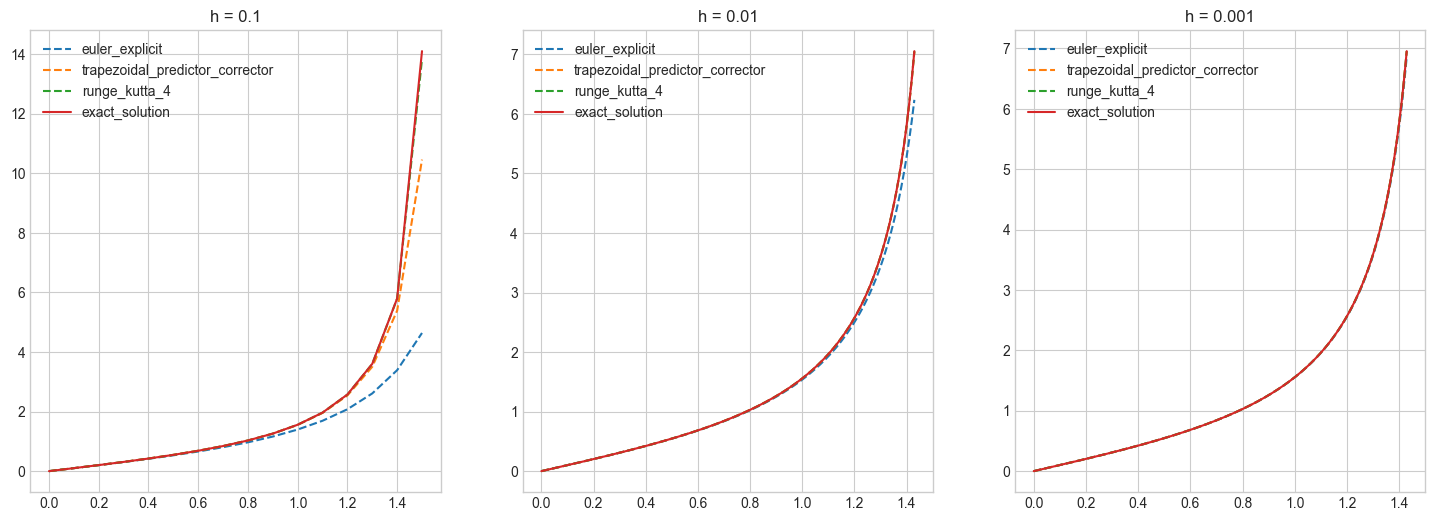

In [ ]:
def f(x: float, y: float) -> float:
    return 1 + y ** 2

def euler_explicit(f: callable, a: float, b: float, y0: float, h: float) -> list:
    n = int(math.ceil((b - a) / h))
    x, y = [a], [y0]
    for i in range(1, n + 1):
        x.append(a + i * h)
        y.append(y[-1] + h * f(x[-1], y[-1]))
    return x, y

def trapezoidal_predictor_corrector(f: callable, a: float, b: float, y0: float, h: float) -> list:
    n = int(math.ceil((b - a) / h))
    x, y = [a], [y0]
    for i in range(1, n + 1):
        x.append(a + i * h)
        y.append(y[-1] + h / 2 * (f(x[-1], y[-1]) + f(x[-1] + h, y[-1] + h * f(x[-1], y[-1]))))
    return x, y

def runge_kutta_4(f: callable, a: float, b: float, y0: float, h: float) -> list:
    n = int(math.ceil((b - a) / h))
    x, y = [a], [y0]
    for i in range(1, n + 1):
        x.append(a + i * h)
        k1 = h * f(x[-1], y[-1])
        k2 = h * f(x[-1] + h / 2, y[-1] + k1 / 2)
        k3 = h * f(x[-1] + h / 2, y[-1] + k2 / 2)
        k4 = h * f(x[-1] + h, y[-1] + k3)
        y.append(y[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return x, y

def exact_solution(x: float) -> float:
    return math.tan(x)

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

a, b, y0 = 0, math.pi * 5 / 11, 0

hs = [0.1, 0.01, 0.001]
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, h in enumerate(hs):
    x, y = euler_explicit(f, a, b, y0, h)
    ax[i].plot(x, y, label='euler_explicit', linestyle='dashed')
    x, y = trapezoidal_predictor_corrector(f, a, b, y0, h)
    ax[i].plot(x, y, label='trapezoidal_predictor_corrector', linestyle='dashed')
    x, y = runge_kutta_4(f, a, b, y0, h)
    ax[i].plot(x, y, label='runge_kutta_4', linestyle='dashed')
    x = [a + i * h for i in range(int(math.ceil((b - a) / h)) + 1)]
    y = [exact_solution(x_) for x_ in x]
    ax[i].plot(x, y, label='exact_solution')
    ax[i].legend()
    ax[i].title.set_text(f'h = {h}')

plt.show()
    


用龙格库塔 4 阶方法求解描述振荡器的经典 van der Pol 微分方程，分别取 $\mu = 0.01, 0.1, 1$，作图比较计算结果。

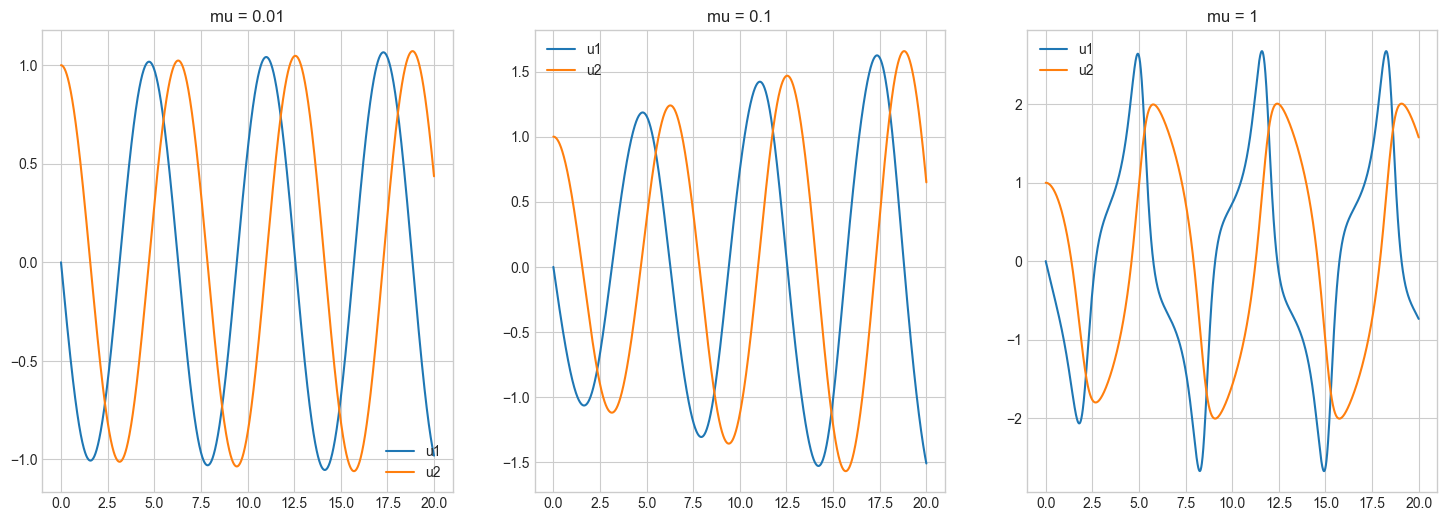

In [ ]:
def u1_prime(t: float, u1: float, u2: float, mu: float) -> float:
    return mu * (1 - u2 ** 2) * u1 - u2

def u2_prime(t: float, u1: float, u2: float, mu: float) -> float:
    return u1

def runge_kutta_4_van_der_pol(mu: float, a: float, b: float, u1_0: float, u2_0: float, h: float) -> list:
    n = int(math.ceil((b - a) / h))
    t, u1, u2 = [a], [u1_0], [u2_0]
    for i in range(1, n + 1):
        t.append(a + i * h)
        k1 = h * u1_prime(t[-1], u1[-1], u2[-1], mu)
        l1 = h * u2_prime(t[-1], u1[-1], u2[-1], mu)
        k2 = h * u1_prime(t[-1] + h / 2, u1[-1] + k1 / 2, u2[-1] + l1 / 2, mu)
        l2 = h * u2_prime(t[-1] + h / 2, u1[-1] + k1 / 2, u2[-1] + l1 / 2, mu)
        k3 = h * u1_prime(t[-1] + h / 2, u1[-1] + k2 / 2, u2[-1] + l2 / 2, mu)
        l3 = h * u2_prime(t[-1] + h / 2, u1[-1] + k2 / 2, u2[-1] + l2 / 2, mu)
        k4 = h * u1_prime(t[-1] + h, u1[-1] + k3, u2[-1] + l3, mu)
        l4 = h * u2_prime(t[-1] + h, u1[-1] + k3, u2[-1] + l3, mu)
        u1.append(u1[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        u2.append(u2[-1] + (l1 + 2 * l2 + 2 * l3 + l4) / 6)
    return t, u1, u2

mu = [0.01, 0.1, 1]
a, b, u1_0, u2_0 = 0, 20, 0, 1
h = 0.01

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    t, u1, u2 = runge_kutta_4_van_der_pol(mu[i], a, b, u1_0, u2_0, h)
    ax[i].plot(t, u1, label='u1')
    ax[i].plot(t, u2, label='u2')
    ax[i].title.set_text(f'mu = {mu[i]}')
    ax[i].legend()

plt.show()

试用 Adams Fourth-Order Predictor-Corrector 格式，求解以下 ODE 的数值解（取 $h = 1, 0.5, 0.25, 0.125$）

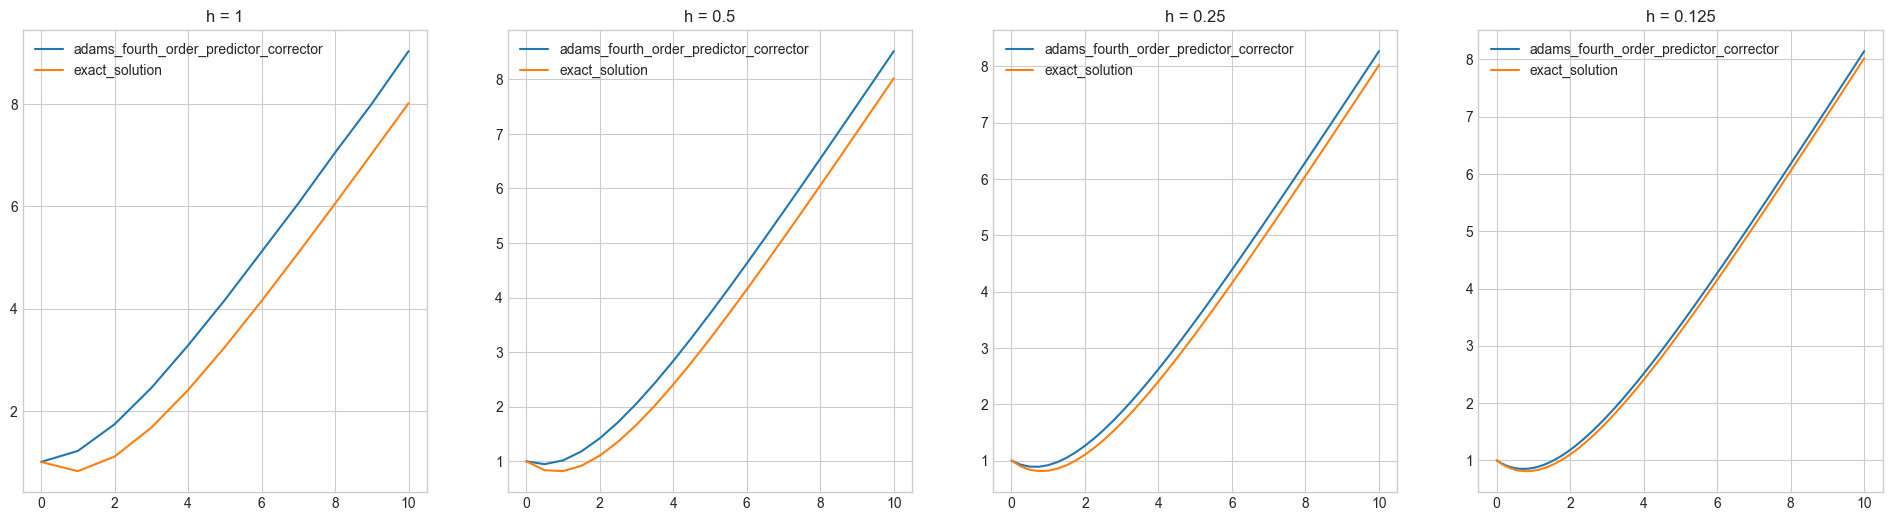

In [ ]:
def f(t: float, y: float) -> float:
    return (t - y) / 2

def exact_solution(t: float) -> float:
    return t - 2 + 3 * math.exp(-t / 2)

def adams_fourth_order_predictor_corrector(a: float, b: float, y0: float, h: float) -> list:
    n = int(math.ceil((b - a) / h))
    t, y = [a], [y0]
    for i in range(1, 4):
        t.append(a + i * h)
        k1 = h * f(t[-1], y[-1])
        k2 = h * f(t[-1] + h / 2, y[-1] + k1 / 2)
        k3 = h * f(t[-1] + h / 2, y[-1] + k2 / 2)
        k4 = h * f(t[-1] + h, y[-1] + k3)
        y.append(y[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    for i in range(4, n + 1):
        t.append(a + i * h)
        y.append(y[-1] + h / 24 * (55 * f(t[-1], y[-1]) - 59 * f(t[-2], y[-2]) + 37 * f(t[-3], y[-3]) - 9 * f(t[-4], y[-4])))
    return t, y

a, b, y0 = 0, 10, 1
hs = [1, 0.5, 0.25, 0.125]

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

for i, h in enumerate(hs):
    t, y = adams_fourth_order_predictor_corrector(a, b, y0, h)
    ax[i].plot(t, y, label='adams_fourth_order_predictor_corrector')
    t = [a + i * h for i in range(int(math.ceil((b - a) / h)) + 1)]
    y = [exact_solution(t_) for t_ in t]
    ax[i].plot(t, y, label='exact_solution')
    ax[i].title.set_text(f'h = {h}')
    ax[i].legend()

plt.show()

求解线性方程组

$$
\begin{aligned}
4x - y + z & = 7 \\
4x - 8y + z & = -21 \\
-2x + y + 5z & = 15
\end{aligned}
$$

1. 试用 LU 分解求解此方程组；
2. 分别用 Jacobi, Gauss-Seidel 方法求解此方程组。

In [ ]:
A = np.array([[4, -1, 1], [4, -8, 1], [-2, 1, 5]])
B = np.array([7, -21, 15])

def lu_decomposition(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        L[i][i] = 1
        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
        for j in range(i + 1, n):
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]
    Y = np.zeros(n)
    for i in range(n):
        Y[i] = B[i] - sum(L[i][j] * Y[j] for j in range(i))
    X = np.zeros(n)
    for i in range(n - 1, -1, -1):
        X[i] = (Y[i] - sum(U[i][j] * X[j] for j in range(i + 1, n))) / U[i][i]
    return L, U, X

L, U, X = lu_decomposition(A, B)

print(L, U, sep='\n')

print(X)

def jacobi(A: np.ndarray, B: np.ndarray, TOL: float) -> np.ndarray:
    n = len(A)
    X = np.zeros(n)
    cnt = 0
    while True:
        cnt += 1
        X_new = np.zeros(n)
        for i in range(n):
            X_new[i] = (B[i] - sum(A[i][j] * X[j] for j in range(n) if j != i)) / A[i][i]
        if max(abs(X_new - X)) < TOL:
            break
        X = X_new
    return X, cnt

X, cnt = jacobi(A, B, 1e-6)
print(X, "with", cnt, "iterations")

def gauss_seidel(A: np.ndarray, B: np.ndarray, TOL: float) -> np.ndarray:
    n = len(A)
    X = np.zeros(n)
    cnt = 0
    while True:
        cnt += 1
        X_new = np.zeros(n)
        for i in range(n):
            X_new[i] = (B[i] - sum(A[i][j] * X_new[j] for j in range(i)) - sum(A[i][j] * X[j] for j in range(i + 1, n))) / A[i][i]
        if max(abs(X_new - X)) < TOL:
            break
        X = X_new
    return X, cnt

X, cnt = gauss_seidel(A, B, 1e-6)
print(X, "with", cnt, "iterations")

[[ 1.          0.          0.        ]
 [ 1.          1.          0.        ]
 [-0.5        -0.07142857  1.        ]]
[[ 4.  -1.   1. ]
 [ 0.  -7.   0. ]
 [ 0.   0.   5.5]]
[2. 4. 3.]
[1.99999932 3.99999975 3.00000035] with 15 iterations
[1.99999964 3.99999976 2.9999999 ] with 9 iterations


已知观测数据，求一个二次多项式拟合这组数据，试写出其最小二乘拟合模型，并给出其正则方程组及其解。

In [ ]:
X = np.array([-2, -1, 0, 1, 2])
Y = np.array([0, 1, 2, 1, 0])

def least_squares(X: np.ndarray, Y: np.ndarray, n: int) -> np.ndarray:
    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)
    for i in range(n + 1):
        for j in range(n + 1):
            A[i][j] = sum(x ** (i + j) for x in X)
        B[i] = sum(Y[j] * X[j] ** i for j in range(len(X)))
    return np.linalg.solve(A, B)

n = 2
a = least_squares(X, Y, n)
print(a)

[ 1.65714286  0.         -0.42857143]


研究发现单原子波函数的基本形式为 $y = ae^{-bx}$，试根据实验室测试数据确定参数 $a, b$。

In [ ]:
X = np.array([0, 1, 2, 4])
Y = np.array([2.010, 1.210, 0.740, 0.450])

def least_squares(X: np.ndarray, Y: np.ndarray, n: int) -> np.ndarray:
    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)
    for i in range(n + 1):
        for j in range(n + 1):
            A[i][j] = sum(x ** (i + j) for x in X)
        B[i] = sum(Y[j] * X[j] ** i for j in range(len(X)))
    return np.linalg.solve(A, B)

n = 1
a = least_squares(X, np.log(Y), n)

a[0] = math.exp(a[0])
a[1] = -a[1]

print(a)

[1.81232309 0.36989939]


已知矩阵 $\mathbf{A}$ 是一个对称矩阵，且其特征值为 $\lambda_1 = 6, \lambda_2 = 3, \lambda_3 = 1$，分别利用幂法、对称幂法、反幂法求其最大特征值和特征向量。

In [ ]:
A = np.array([[4, -1, 1], [-1, 3, -2], [1, -2, 3]])

def power_method(A: np.ndarray, TOL: float) -> tuple:
    n = len(A)
    X = np.ones(n)
    Y = np.ones(n)
    cnt = 0
    while True:
        cnt += 1
        X = np.dot(A, Y)
        new_Y = X / np.max(np.abs(X))
        if np.linalg.norm(new_Y - Y) < TOL:
            break
        Y = new_Y
    return np.max(X), X, cnt

def symmetric_power_method(A: np.ndarray, TOL: float) -> tuple:
    n = len(A)
    X = np.ones(n)
    Y = np.ones(n)
    cnt = 0
    while True:
        cnt += 1
        X = np.dot(A, Y)
        new_Y = X / np.linalg.norm(X)
        if np.linalg.norm(new_Y - Y) < TOL:
            break
        Y = new_Y
    return np.dot(Y, np.dot(A, Y)), Y, cnt

def inverse_power_method(A: np.ndarray, TOL: float) -> tuple:
    n = len(A)
    X = np.ones(n)
    Y = np.ones(n)
    cnt = 0
    while True:
        cnt += 1
        X = np.dot(A, Y)
        new_Y = X / np.max(np.abs(Y))
        if np.linalg.norm(new_Y - Y) < TOL:
            break
        Y = new_Y
    return np.max(Y), Y, cnt

lambda1, X1, cnt1 = power_method(A, 1e-7)
lambda2, X2, cnt2 = symmetric_power_method(A, 1e-7)
lambda3, X3, cnt3 = inverse_power_method(np.linalg.inv(A - np.eye(3, 3) * 5.5), 1e-7)

lambda3 = 5.5 + 1 / lambda3

print(f'power_method: got lambda = {lambda1}, X = {X1}, with {cnt1} iterations')
print(f'symmetric_power_method: got lambda = {lambda2}, X = {X2}, with {cnt2} iterations')
print(f'inverse_power_method: got lambda = {lambda3}, X = {X3}, with {cnt3} iterations')

power_method: got lambda = 5.999999821186076, X = [ 5.99999982 -5.99999955  5.99999955], with 26 iterations
symmetric_power_method: got lambda = 5.9999999999999165, X = [ 0.57735041 -0.5773502   0.5773502 ], with 24 iterations
inverse_power_method: got lambda = 6.000000006191799, X = [ 1.99999998 -1.99999995  1.99999995], with 13 iterations


分别利用 Householder 变换和 Givens 旋转变化方法求 $\mathbf{A}$ 的 QR 分解

In [ ]:
'''
### 分别利用 Householder 变换和 Givens 旋转变化方法求 $\mathbf{A}$ 的 QR 分解。

$$
A = \begin{bmatrix}
1 & 0 & 0 \\
1 & 1 & 0 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$
'''

A = np.array([[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 1, 1]])